<a href="https://colab.research.google.com/github/JCLArriaga5/trajectory-simulation-pelican-robot/blob/master/simulation_nb/pelican_trajectory_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr = "3">
<center>
  <h3> Trajectory Simulation of Pelican Robot </h3>
    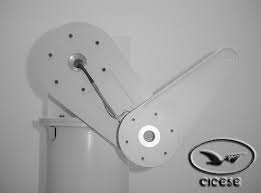
    
  <i> José Carlos López Arriaga </i>
  </center>
<hr = "3">

# Clone Repository for the simulation 

In [ ]:
!git clone https://github.com/JCLArriaga5/trajectory-simulation-pelican-robot.git

Cloning into 'trajectory-simulation-pelican-robot'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 86 (delta 42), reused 57 (delta 20), pack-reused 0
Unpacking objects: 100% (86/86), done.


# Import functions of repository

In [ ]:
import sys
sys.path.append('/content/trajectory-simulation-pelican-robot')
from pelcnrbt.probot import *

# Simulation

The size of the links is:
  - $Link_1 = 0.26 m$
  - $Link_2 = 0.26 m$

So the desired position must be between the ranges:
  - $x(-0.5, 0.5)$
  - $y(-0.5, 0.5)$

The gains $Kp$, $Kv$ were taken from chapter 6 of Control of robot manipulators in joint space [[1]](https://www.springer.com/gp/book/9781852339944), the chapter presents analysis and results of the pelican robot with those gains.

$K_p = \begin{bmatrix}
          30 & 0 \\
          0 & 30
          \end{bmatrix} [Nm/rad], 
K_v = \begin{bmatrix}
          7 & 0 \\
          0 & 3
          \end{bmatrix} [Nms/rad].
$

In [ ]:
# Desired position
pd = [0.26, 0.13]
# Gains
kp = [[30.0, 0.0],
      [0.0, 30.0]]
kv = [[7.0, 0.0],
      [0.0, 3.0]]
# Initial values
q1 = [0.0]
q2 = [0.0]
ui = [0.0, 0.0]
vi = [0.0, 0.0]
ti = 0.0
h = 0.001
tf = 1.0

sim = pelican_robot(pd, kp, kv)
uf, vf = sim.RK4(ti, ui, vi, tf, h)

print('Angles for desired position: q1 = {} rad, q2 = {} rad.'.format(uf[0], uf[1]))

Angles for desired position: q1 = 1.0529275729985825 rad, q2 = 1.9552771157838196 rad.


## Plot graph of error $\tilde{q}$

The $q_d$ are obtained by the inverse kinematics of the desired position.

$\tilde{q} = \begin{bmatrix}
                q_1d - q_1(t) \\
                q_2d - q_2(t)
              \end{bmatrix}
$

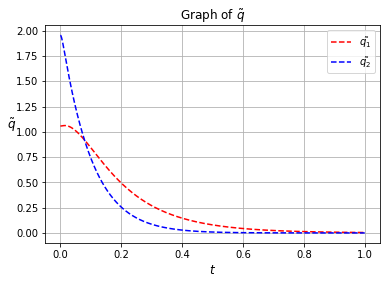

In [ ]:
sim.plot_q_error()

## Plot velocitys behavior 

Plot Behavior of the speed of each link with respect to the time until reaching the desired position

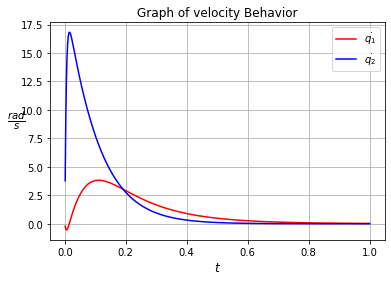

In [ ]:
sim.plot_velocity_bhvr()

## Plot trajectory to desired point

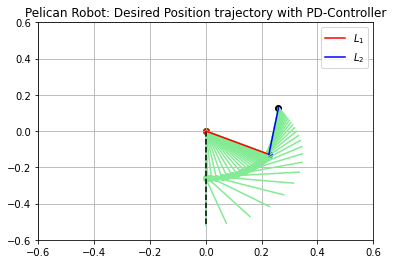

In [ ]:
sim.plot_trajectory(50)